In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Hipóteses

## Primeira hipótese
*É possível agrupar os usuários de acordo com o tipo de comida que consomem*
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds

## Segunda hipótese
*É possível agrupar os usuários de acordo com a forma de compra*
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases

## Terceira hipótese
*Clientes com famílias maiores possuem menor tempo desde a última compra*

## Quarta hipótese
*Um determinado grupo (cluster) tende a ser mais afetado pelo mkt*

## Quinta hipótese
*Os clientes de renda mais baixa representam que quantidade das compras? Pertencem a um grupo específico?*

## Sexta hipótese
*Quem tende a comprar mais? Solteiros ou casados? Quem compra com mais frequência?*

In [2]:
dataset = pd.read_csv("../data/dataset.csv").dropna()

In [3]:
# Cria a forma de agrupar os clientes no tipo de produto
x_produto = dataset[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]]
cluster_produto = KMeans(n_clusters=6, random_state=0)
cluster_produto.fit(x_produto.values)

est_cluster_produto = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "5": [],
    "6": [],
    "7": [],
    "8": [],
    "9": [],
    "10": [],
    "11": []
}

for i in range(0, len(x_forma_compra)):
    # Set de informações para o registro em iteração
    campos = [c for c in x_produto.columns]
    produtos = [v for v in x_produto.values[i]]
    cluster_classificado = str(cluster_produto.labels_[i])
    
    # Ordena (bolha) para descobrir os métodos mais utilizados
    total = len(produtos)
    for j in range(0, total):
        for k in range(j, total):
            pivot = produtos[j]
            
            if pivot < produtos[k]:
                produtos[j], produtos[k] = produtos[k], pivot
                campos[j], campos[k] = campos[k], campos[j]
    
    # Registra o resultado na chave do cluster
    est_cluster_produto[cluster_classificado].append(campos[0])
    est_cluster_produto[cluster_classificado].append(campos[1])
    
# Sumariza e descreve o cluster encontrado
for cluster in est_cluster_produto.keys():
    campos = list(set(est_cluster_produto[cluster]))
    res = []
    
    for campo in campos:
        cont = est_cluster_produto[cluster].count(campo)
        res.append(f"{campo}: {cont}")
    print(res)

NameError: name 'x_forma_compra' is not defined

In [ ]:
# Cria a forma de agrupar os clientes na forma de compra
x_forma_compra = dataset[[
    "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases"
]]
cluster_forma_compra = KMeans(n_clusters=4, random_state=0)
cluster_forma_compra.fit(x_forma_compra.values)

est_cluster_compra = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "5": [],
    "6": [],
    "7": [],
    "8": [],
    "9": [],
    "10": [],
    "11": []
}

for i in range(0, len(x_forma_compra)):
    # Set de informações para o registro em iteração
    campos = [c for c in x_forma_compra.columns]
    formas = [v for v in x_forma_compra.values[i]]
    cluster_classificado = str(cluster_forma_compra.labels_[i])
    
    # Ordena (bolha) para descobrir os métodos mais utilizados
    total = len(formas)
    for j in range(0, total):
        for k in range(j, total):
            pivot = formas[j]
            
            if pivot < formas[k]:
                formas[j], formas[k] = formas[k], pivot
                campos[j], campos[k] = campos[k], campos[j]
    
    # Registra o resultado na chave do cluster
    est_cluster_compra[cluster_classificado].append(campos[0])
    
# Sumariza e descreve o cluster encontrado
for cluster in est_cluster_compra.keys():
    campos = list(set(est_cluster_compra[cluster]))
    res = []
    
    for campo in campos:
        cont = est_cluster_compra[cluster].count(campo)
        res.append(f"{campo}: {cont}")
    print(res)

In [ ]:
# Avaliando número de clusters para o tipo de produto
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_produto.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [ ]:
# Avaliando número de clusters para a forma de compra
inercia = []
for i in range(1, 16):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_forma_compra.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 16), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [24]:
max(dataset["Year_Birth"].values), min(dataset["Year_Birth"].values)

(1996, 1893)

In [59]:
# Define as colunas para agrupamento de clientes
col_grupo_clientes = [
    "Year_Birth",
    "Education",
    "Marital_Status",
    #"Income",
    "Kidhome",
    "Teenhome"
]
df_clientes = dataset[col_grupo_clientes]

# Prepara os dados para agrupamento de perfil de clientes
le_ed = LabelEncoder()
df_clientes["Education"] = le_ed.fit_transform(df_clientes["Education"].values)

le_ec = LabelEncoder()
df_clientes["Marital_Status"] = le_ec.fit_transform(df_clientes["Marital_Status"].values)

# Executa o agrupamento
cluster_clientes = KMeans(n_clusters=6, random_state=0)
cluster_clientes.fit(df_clientes.values)

# Monta um dataset para explicação dos clusters
df_cluster_clientes = []
df_clientes["cluster"] = cluster_clientes.labels_

# Retorna as classificações dos campos
df_clientes["Education"] = le_ed.inverse_transform(df_clientes["Education"].values)
df_clientes["Marital_Status"] = le_ec.inverse_transform(df_clientes["Marital_Status"].values)

# Realiza um encode para a data de nascimento
encode_data = []
anos = [n for n in range(1900, 2010, 10)]

for i in range(0, len(df_clientes)):
    dn = df_clientes["Year_Birth"].values[i]
    for j in range(0, len(anos) - 1):
        
        if j == 0 and dn < anos[j]:
            encode_data.append(f"-{anos[j]}")
            break
            
        elif dn >= anos[j] and dn < anos[j + 1]:
            encode_data.append(f"{anos[j]}-{anos[j + 1]}")
            break
        
        elif j == len(anos) - 2 and dn >= anos[j + 1]:
            encode_data.append(f"+{anos[j + 1]}")

df_clientes["Year_Birth"] = encode_data 

for cluster in set(cluster_clientes.labels_):
    subset = df_clientes.loc[df_clientes["cluster"] == cluster]
    print(f"{len(subset)} pessoas no grupo {cluster}")
    
    for campo in col_grupo_clientes:
        for categoria in set(subset[campo].values):
            df_cluster_clientes.append({
                "cluster": cluster,
                "campo": campo,
                "categoria": categoria,
                "observacoes": list(subset[campo].values).count(categoria)
            })
            
df_cluster_clientes = pd.DataFrame(df_cluster_clientes)

342 pessoas no grupo 0
526 pessoas no grupo 1
416 pessoas no grupo 2
499 pessoas no grupo 3
430 pessoas no grupo 4
3 pessoas no grupo 5


C:\Users\99818854\Pessoal\ProjetosGit\case-client-behavior-ifood\.venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\99818854\Pessoal\ProjetosGit\case-client-behavior-ifood\.venv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\99818854\Pessoal\ProjetosGit\case-client-behavior-ifood\.venv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [60]:
df_clientes.loc[df_clientes["cluster"] == 5]

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,cluster
192,1900-1910,2n Cycle,Divorced,1,0,5
239,-1900,2n Cycle,Single,0,1,5
339,-1900,PhD,Together,0,0,5


C:\Users\99818854\Pessoal\ProjetosGit\case-client-behavior-ifood\.venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\99818854\Pessoal\ProjetosGit\case-client-behavior-ifood\.venv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


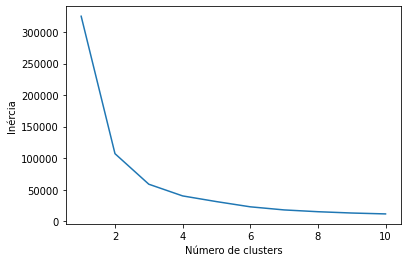

In [57]:
# Define as colunas para agrupamento de clientes
col_grupo_clientes = [
    "Year_Birth",
    "Education",
    "Marital_Status",
    #"Income",
    "Kidhome",
    "Teenhome"
]
df_clientes = dataset[col_grupo_clientes]

# Prepara os dados para agrupamento de perfil de clientes
le_ed = LabelEncoder()
df_clientes["Education"] = le_ed.fit_transform(df_clientes["Education"].values)

le_ec = LabelEncoder()
df_clientes["Marital_Status"] = le_ec.fit_transform(df_clientes["Marital_Status"].values)

# Executa análise para quantidade de clusters
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(df_clientes.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [ ]:
df_clientes

In [ ]:
set(dataset["Teenhome"])

In [ ]:
# Avaliando número de clusters para o tipo de produto
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_produto.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [ ]:
x

In [ ]:
dataset.columns

In [ ]:
dataset